In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def build_model(learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape=(28 * 28,), activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Training with learning rate: 0.0001
Training with learning rate: 0.01
Training with learning rate: 0.1
Training with learning rate: 1.0


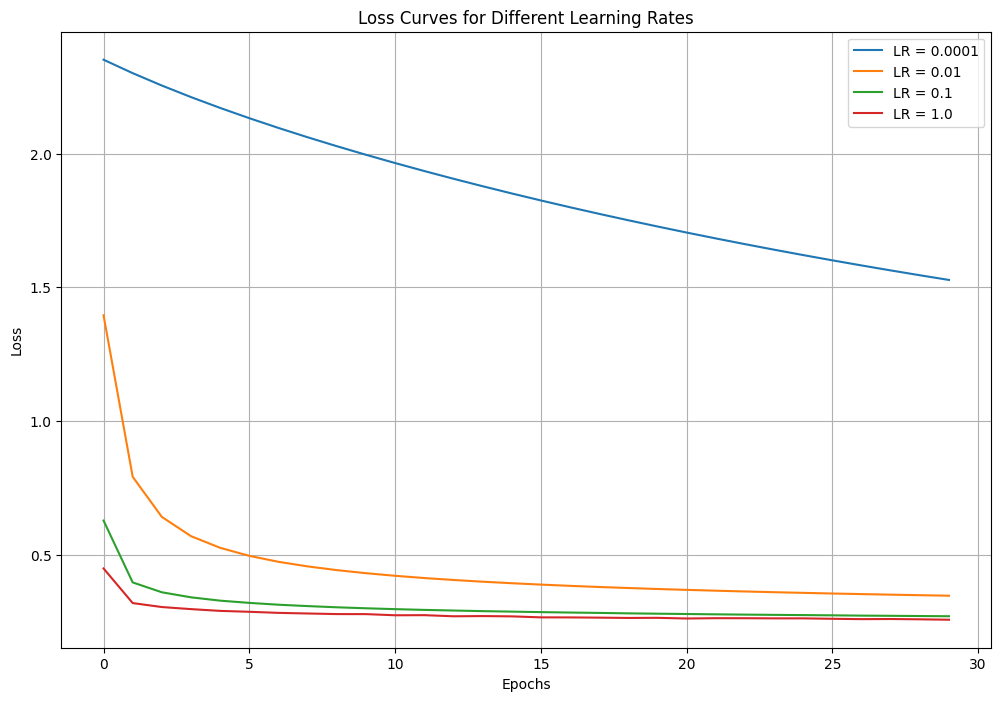

In [3]:
learning_rates = [0.0001, 0.01, 0.1, 1.0]
history_dict = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = build_model(lr)
    history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=0)
    history_dict[lr] = history.history

plt.figure(figsize=(12, 8))
for lr in learning_rates:
    plt.plot(history_dict[lr]['loss'], label=f"LR = {lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()